In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt
import numpy as np
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

In [2]:
df = pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
display(df.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Prints the names of the features
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [4]:
# Let's check for null values
print(pd.isnull(df).sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Text(0.5, 1.0, 'Time Signature Distribution')

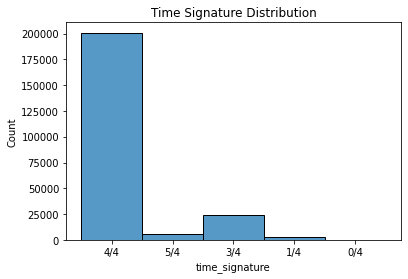

In [5]:
# There are no null values, thus there's no need to perform any kind of operation
# in order to handle the missing values
sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Tracks with a 0/4 time signature: 8


Text(0.5, 1.0, 'Time Signature Distribution')

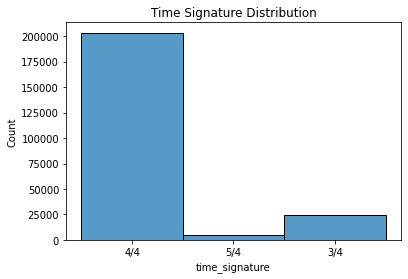

In [6]:
# The samples in the dataframe where the field 'time_signature' is '1/4'
# actually represent songs with mostly a 4/4 time signature, since it is
# most likely an error by who created the dataframe we're going to change it
# to the '4/4' value
df['time_signature'] = df['time_signature'].replace(['1/4'],'4/4')

print("Tracks with a 0/4 time signature: %s" % len(df[df['time_signature'] == '0/4']));
# Since there are just 8 samples with a '0/4' time signature,
# and since it is clearly an error, I'm going to simply delete them
df = df[df['time_signature'] != '0/4']

sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Text(0.5, 1.0, 'Genre Distribution')

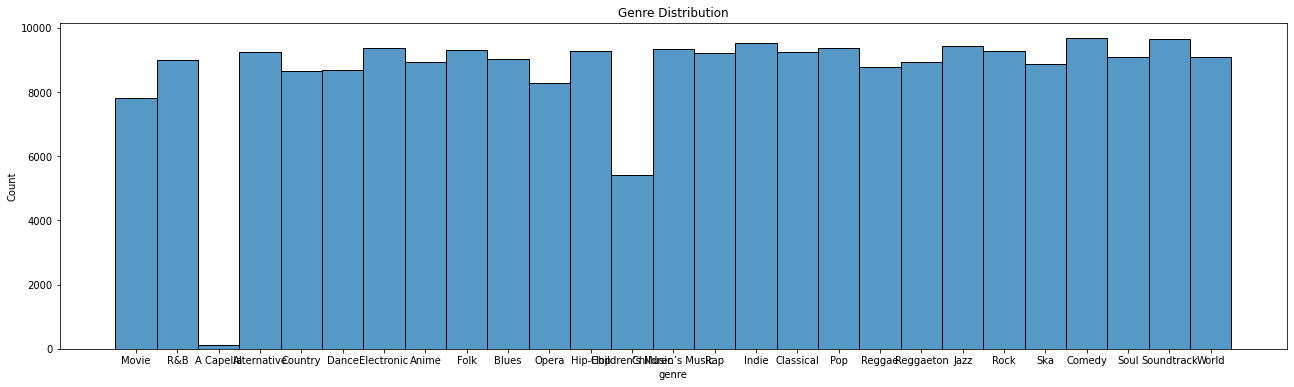

In [7]:
plt.figure(figsize=(22, 6))
sns.histplot(df['genre']).set_title('Genre Distribution')

In [8]:
ids = df["track_id"]
>>> df[ids.isin(ids[ids.duplicated()])].sort_values("track_id")

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14492,Dance,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
110840,Pop,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
96926,Children’s Music,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.034900,0.564,211789,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
153533,Rock,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,58,0.034900,0.564,211789,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
145387,Indie,Alabama Shakes,Gemini,001ifh9Zkyc5DhK7AGQRtK,42,0.447000,0.411,395573,0.422,0.121000,E,0.0742,-5.475,Minor,0.0459,147.465,4/4,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,Alternative,Bay Faction,Beach Book,7zy2ezQByCeFcaDtsxt77o,40,0.063200,0.537,189750,0.474,0.002590,E,0.0917,-7.440,Minor,0.0500,147.310,4/4,0.474
97007,Children’s Music,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,54,0.000508,0.488,195091,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376
4751,Alternative,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,50,0.000508,0.488,195091,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376
100080,Children’s Music,Moonstar88,Migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.217000,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221


Classical Tracks number: 9256
Pop Tracks number: 9385
Folk Tracks number: 9299
Total Tracks number: 27940


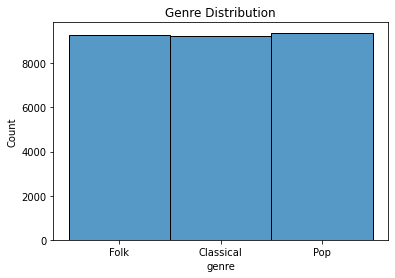

In [9]:
# i'm going to pick the three genres of the Philip Tagg's axiomatic triangle:
# Classical, Pop and Folk, as we can see they are pretty balanced

taggGenres = ['Classical','Pop','Folk']
df = df[df.genre.isin(taggGenres)];
sns.histplot(df['genre']).set_title('Genre Distribution')

print("Classical Tracks number: %s" % len(df[df['genre'] == 'Classical']));
print("Pop Tracks number: %s" % len(df[df['genre'] == 'Pop']));
print("Folk Tracks number: %s" % len(df[df['genre'] == 'Folk']));

print("Total Tracks number: %s" % len(df));

In [10]:
ids = df["track_id"]
>>> dup_df = df[ids.isin(ids[ids.duplicated()])].sort_values("track_id")
display(dup_df)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
40627,Folk,Seals and Crofts,Summer Breeze,01UYpHuzHi4eB9PAbDoPY2,71,0.6110,0.501,203967,0.474,0.029800,F,0.0667,-10.041,Major,0.0386,88.609,4/4,0.350
111238,Pop,Seals and Crofts,Summer Breeze,01UYpHuzHi4eB9PAbDoPY2,71,0.6110,0.501,203967,0.474,0.029800,F,0.0667,-10.041,Major,0.0386,88.609,4/4,0.350
41219,Folk,The Zombies,This Will Be Our Year,02KpkaZbiutsR0ucxce4Sh,65,0.6260,0.535,127733,0.424,0.000000,A,0.1910,-7.491,Major,0.0314,97.506,4/4,0.539
113906,Pop,The Zombies,This Will Be Our Year,02KpkaZbiutsR0ucxce4Sh,65,0.6260,0.535,127733,0.424,0.000000,A,0.1910,-7.491,Major,0.0314,97.506,4/4,0.539
40666,Folk,Peter Bradley Adams,My Arms Were Always Around You,02a2RQEICEzbdPPYh0aLnJ,68,0.7240,0.643,200800,0.436,0.459000,C#,0.1100,-12.245,Major,0.0273,91.485,4/4,0.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112103,Pop,Mat Kearney,Money,7zb2TzZwpXuBJutFIqS6lA,61,0.7100,0.740,149560,0.622,0.000122,C#,0.1800,-5.492,Minor,0.0306,93.985,4/4,0.759
41122,Folk,Local Natives,When Am I Gonna Lose You,7ze7X8r4fopBs9ZRtwYFOX,59,0.0417,0.452,264213,0.834,0.000360,B,0.1190,-4.657,Major,0.0967,142.088,4/4,0.514
113662,Pop,Local Natives,When Am I Gonna Lose You,7ze7X8r4fopBs9ZRtwYFOX,59,0.0417,0.452,264213,0.834,0.000360,B,0.1190,-4.657,Major,0.0967,142.088,4/4,0.514
41038,Folk,Norah Jones,Sunrise,7zkLpY72g6lKQbiHDqri1S,70,0.9410,0.526,200627,0.299,0.097000,G#,0.1060,-13.797,Major,0.0310,156.848,4/4,0.679


In [11]:
# Remove every track which is duplicated
df = df.drop_duplicates(subset = ["track_id"], keep=False)
# Remove duplicates in the only duplicates dataframe and assign half to Pop and half to Folk
dup_df = dup_df.drop_duplicates(subset = ["track_id"])
part_50 = dup_df.sample(frac = 0.5)
rest_part_50 = dup_df.drop(part_50.index)
part_50 = part_50.assign(genre = 'Pop')
rest_part_50 = rest_part_50.assign(genre = 'Folk')
df = pd.concat([df, part_50, rest_part_50])

In [12]:
ids = df["track_id"]
>>> df[ids.isin(ids[ids.duplicated()])].sort_values("track_id")

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [13]:
print("Classical Tracks number: %s" % len(df[df['genre'] == 'Classical']));
print("Pop Tracks number: %s" % len(df[df['genre'] == 'Pop']));
print("Folk Tracks number: %s" % len(df[df['genre'] == 'Folk']));

print("Total Tracks number: %s" % len(df));

Classical Tracks number: 9252
Pop Tracks number: 9030
Folk Tracks number: 8946
Total Tracks number: 27228


Text(0.5, 1.0, 'Key usage for every genre')

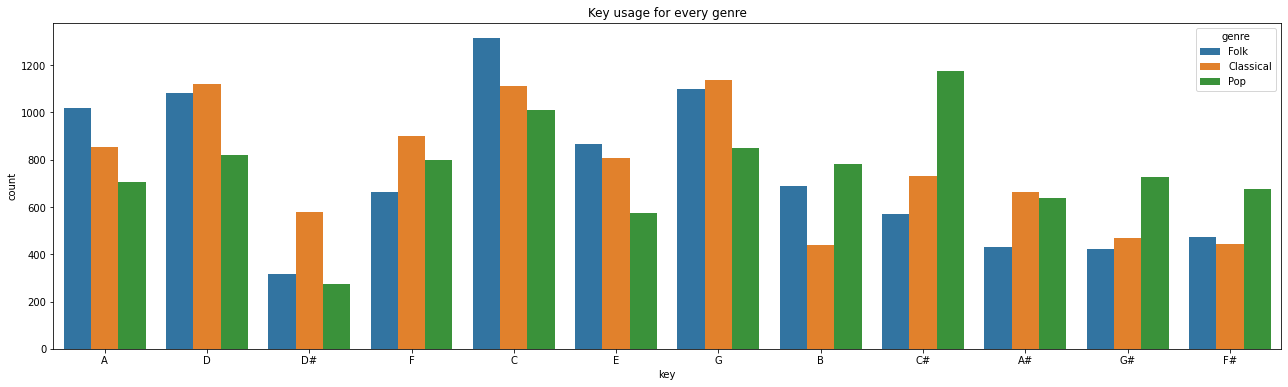

In [14]:
plt.figure(figsize=(22, 6))
sns.countplot(x = 'key', hue = 'genre', data = df)
plt.title('Key usage for every genre')
# This is the distribution of key usage for every genre, I decided at the end to drop this and the mode
# features since they don't have much meaning in a genre prediction

In [15]:
# Let's now remove the unnecessary features
new_df = df.drop(['artist_name','track_name','track_id','popularity','key','mode','duration_ms'],axis = 1)
# Make a one hot encoding of the time signature
new_df.time_signature = new_df.time_signature.map( {'3/4':3 , '4/4':4, '5/4':5} )
new_df = pd.get_dummies(data= new_df, columns=['time_signature'])
# Shuffle the dataset
from sklearn.utils import shuffle
new_df = shuffle(new_df)
display(new_df.head())

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
126796,Classical,0.992,0.294,0.00625,0.827000,0.1330,-29.636,0.0575,66.553,0.0545,0,0,1
64335,Folk,0.450,0.740,0.46700,0.000005,0.0968,-6.828,0.0325,134.033,0.3520,0,1,0
130317,Classical,0.984,0.363,0.03800,0.899000,0.0533,-36.400,0.0329,105.890,0.2680,0,1,0
40626,Folk,0.600,0.334,0.47200,0.000004,0.3170,-8.792,0.0277,179.167,0.4310,1,0,0
63006,Folk,0.933,0.465,0.17900,0.001270,0.1140,-13.524,0.0338,128.742,0.2190,1,0,0


In [16]:
features = new_df.keys().drop(['genre']);
display(features)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature_3', 'time_signature_4', 'time_signature_5'],
      dtype='object')

In [17]:
# Let's divide the label (genre) from the rest of the dataset and divide the dataset in a training and a testing dataset
new_df.genre = new_df.genre.map( {'Classical':0 , 'Pop':1, 'Folk':2} )
training = new_df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['genre']
X_test = new_df.drop(training.index)[features]
y_test = new_df.drop(training.index)['genre']
display(X_train.head())
display(y_train.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
128588,0.3460,0.0742,0.219,0.874000,0.1570,-17.794,0.0385,76.742,0.0359,1,0,0
126393,0.9340,0.1870,0.182,0.392000,0.1110,-15.519,0.0439,92.731,0.0856,0,1,0
43076,0.9260,0.6150,0.114,0.000004,0.1660,-17.285,0.0357,101.189,0.4010,0,1,0
108698,0.0599,0.6540,0.528,0.000071,0.0975,-6.224,0.0412,82.014,0.3760,0,1,0
104112,0.9330,0.4150,0.137,0.001840,0.5090,-17.273,0.0486,76.363,0.1680,0,1,0


128588    0
126393    0
43076     2
108698    1
104112    0
Name: genre, dtype: int64

In [18]:
# Let's do a MinMaxScaling of the dataset to make all the features in [0,1]
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'
scaler = MinMaxScaler()
# Loudness goes from -60 to 0 db, I will convert it to a positive value before normalizing it 
X_train['loudness'] *= -1
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
display(X_train.head())
X_test['loudness'] *= -1
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
display(X_test.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
128588,0.347389,0.017528,0.219423,0.879276,0.143846,0.382062,0.017664,0.209950,0.036447,1.0,0.0,0.0
126393,0.937751,0.141104,0.182348,0.394366,0.097017,0.334895,0.023515,0.288873,0.086904,0.0,1.0,0.0
43076,0.929719,0.609991,0.114210,0.000004,0.153008,0.371509,0.014629,0.330622,0.407107,0.0,1.0,0.0
108698,0.060139,0.652717,0.529049,0.000072,0.083274,0.142185,0.020590,0.235973,0.381726,0.0,1.0,0.0
104112,0.936747,0.390885,0.137257,0.001851,0.502189,0.371260,0.028609,0.208079,0.170558,0.0,1.0,0.0


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature_3,time_signature_4,time_signature_5
126796,0.995984,0.258326,0.006242,0.831992,0.119414,0.627579,0.038253,0.159657,0.055330,0.0,0.0,1.0
126739,0.867470,0.140009,0.389767,0.001489,0.141810,0.129517,0.011812,0.526292,0.219289,0.0,0.0,1.0
109834,0.014657,0.837862,0.769534,0.000001,0.113306,0.141895,0.064694,0.398897,0.219289,0.0,1.0,0.0
127163,0.956827,0.142200,0.102186,0.000000,0.173369,0.388883,0.011595,0.267485,0.155330,1.0,0.0,0.0
126417,0.975904,0.027607,0.035952,0.975855,0.087855,0.606701,0.016147,0.235904,0.038782,0.0,1.0,0.0


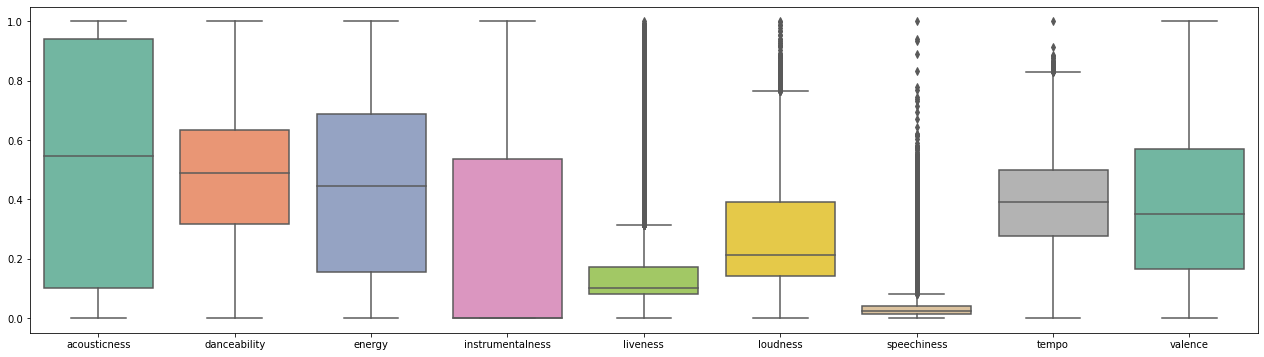

In [19]:
# Let's check the distribution of the various countinuous features
plt.figure(figsize=(22, 6))
ax = sns.boxplot(data=X_train.drop(["time_signature_3","time_signature_4","time_signature_5"], axis=1), palette="Set2")

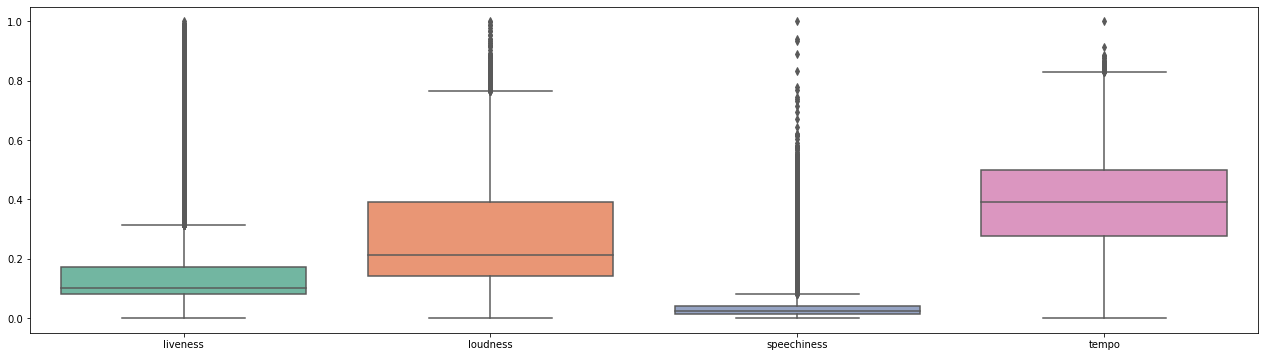

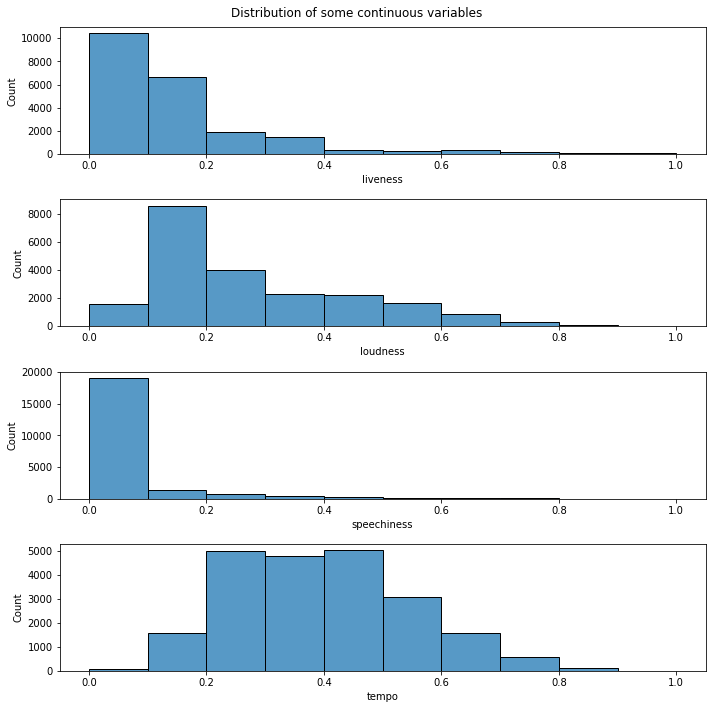

In [20]:
# We see that liveness, loudness, speechiness and tempo do have some HLPs on the upper values
plt.figure(figsize=(22, 6))
features_nout = ["time_signature_3","time_signature_4","time_signature_5","acousticness","danceability","energy","instrumentalness","valence"]
ax = sns.boxplot(data=X_train.drop(features_nout, axis=1), palette="Set2")
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of some continuous variables')
sns.histplot(x= 'liveness', data = X_train, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")
sns.histplot(x= 'loudness', data = X_train, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")
sns.histplot(x= 'speechiness', data = X_train, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")
sns.histplot(x= 'tempo', data = X_train, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")
plt.tight_layout()

Total Tracks number before: 21782
Total Tracks number after: 20923


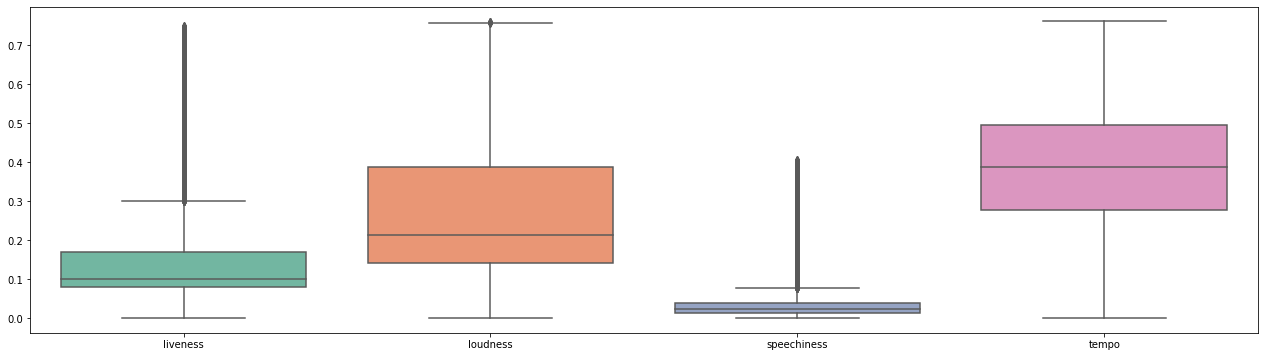

In [21]:
# removing HLPs
print("Total Tracks number before: %s" % len(X_train));
X_train['genre'] = y_train
threshold = 0.01
for col in ['liveness', 'loudness', 'speechiness', 'tempo']:
    upper_threshold = X_train[col].quantile(1 - threshold)
    X_train = X_train[(X_train[col] <= upper_threshold)]

features = new_df.keys().drop(['genre']);
y_train = X_train['genre']
X_train = X_train[features]
    
plt.figure(figsize=(22, 6))
features_nout = ["time_signature_3","time_signature_4","time_signature_5","acousticness","danceability","energy","instrumentalness","valence"]
ax = sns.boxplot(data=X_train.drop(features_nout, axis=1), palette="Set2")
print("Total Tracks number after: %s" % len(X_train));

In [22]:
# Let's split the training set in training and a development set (here called validation)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

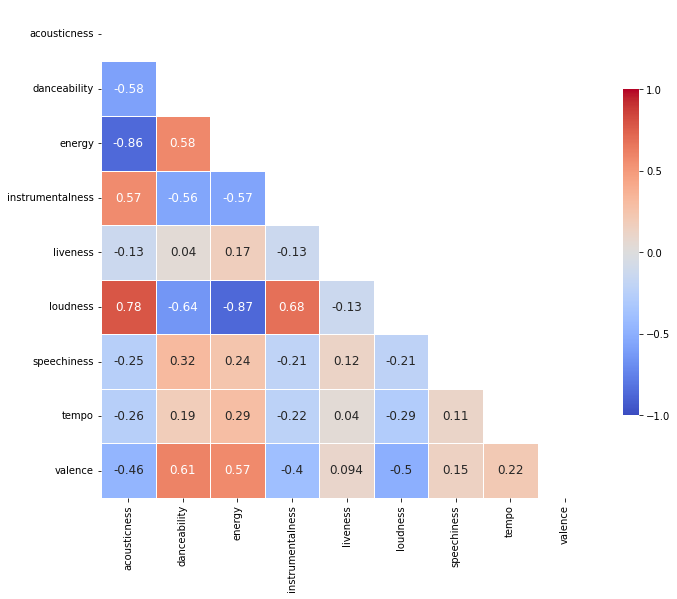

In [23]:
corr_heatmap(X_train.drop(["time_signature_3","time_signature_4","time_signature_5"], axis=1))

In [24]:
# Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [25]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), param_grid = param_grid, verbose=10, n_jobs=-1, error_score="raise")
#best_clf = clf.fit(X_train, y_train)

In [26]:
#print(best_clf.best_estimator_)
#print(best_clf.cv_results_)
#print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')

In [27]:
# Thanks to GridSearch we know that the best choice is LogisticRegression(C=78.47599703514607, multi_class='multinomial', solver='newton-cg')
model = LogisticRegression(C=78.47599703514607, multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=78.47599703514607, multi_class='multinomial',
                   solver='newton-cg')

In [28]:
y_pred = model.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1398
           1       0.79      0.81      0.80      1402
           2       0.74      0.74      0.74      1385

    accuracy                           0.82      4185
   macro avg       0.82      0.82      0.82      4185
weighted avg       0.82      0.82      0.82      4185



In [29]:
# Let's try without loudness
X_train_loudness = X_train.drop(['loudness'], axis=1)
X_valid_loudness = X_valid.drop(['loudness'], axis=1)
lrm_cor = LogisticRegression(C=78.47599703514607, multi_class='multinomial',solver='newton-cg').fit(X_train_loudness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_loudness)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1398
           1       0.77      0.76      0.76      1402
           2       0.70      0.73      0.71      1385

    accuracy                           0.79      4185
   macro avg       0.79      0.79      0.79      4185
weighted avg       0.79      0.79      0.79      4185



In [30]:
# Let's try without energy
X_train_energy = X_train.drop(['energy'], axis=1)
X_valid_energy = X_valid.drop(['energy'], axis=1)
lrm_cor = LogisticRegression(C=78.47599703514607, multi_class='multinomial',solver='newton-cg').fit(X_train_energy, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_energy)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1398
           1       0.79      0.80      0.79      1402
           2       0.73      0.75      0.74      1385

    accuracy                           0.81      4185
   macro avg       0.81      0.81      0.81      4185
weighted avg       0.81      0.81      0.81      4185



In [31]:
# Let's try without acousticness
X_train_acousticness = X_train.drop(['acousticness'], axis=1)
X_valid_acousticness = X_valid.drop(['acousticness'], axis=1)
lrm_cor = LogisticRegression(C=78.47599703514607, multi_class='multinomial',solver='newton-cg').fit(X_train_acousticness, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid_acousticness)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1398
           1       0.79      0.80      0.80      1402
           2       0.73      0.75      0.74      1385

    accuracy                           0.81      4185
   macro avg       0.81      0.81      0.81      4185
weighted avg       0.81      0.81      0.81      4185



In [32]:
# The accuracy changes between 0.81 and 0.79 in every situation, I'm going to just keep those features
# I will now test the data with X_test and y_test
X_train = pd.concat([X_train, X_valid])
y_train = pd.concat([y_train, y_valid])
X_train, y_train = shuffle(X_train, y_train)
model = LogisticRegression(C=78.47599703514607, multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1833
           1       0.79      0.81      0.80      1791
           2       0.74      0.74      0.74      1822

    accuracy                           0.81      5446
   macro avg       0.81      0.81      0.81      5446
weighted avg       0.81      0.81      0.81      5446



In [33]:
# We see that the accuracy doesn't change much
# We'll now try to get to the same result with a Neural Network
from sklearn.neural_network import MLPClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)
mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [500]
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#best_clf = clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_valid)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_valid, t_pred))

In [34]:
# With GridSearch we can see that the estimatore whioch gives the best result is
# MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500)
# I will now perform a second Grid Search with hyperparameters more similar to the ones just found
# and with early stopping in order to be more precise
# I will merge train and valid sets and test on the testing set
X_train = pd.concat([X_train, X_valid])
y_train = pd.concat([y_train, y_valid])
X_train, y_train = shuffle(X_train, y_train)
parameter_space = {
    'hidden_layer_sizes': [(100, 100), (100, 150), (150, 150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.02, 0.04, 0.08],
    'early_stopping': [True, False],
    'max_iter': [500]
}
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy', verbose=10, error_score="raise")
#best_clf = clf.fit(X_train, y_train) # X is train samples and t is the corresponding labels

# best score achieved during the GridSearchCV
#print('GridSearch CV best score : {:.4f}\n\n'.format(clf.best_score_))

# print parameters that give the best results
#print('Parameters that give the best results :','\n\n', (clf.best_params_))

# print estimator that was chosen by the GridSearch
#print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

# %% [code]
# calculate GridSearch CV score on test set
#t_pred = clf.predict(X_test)

#print('Model classification report with GridSearcg CV: \n', classification_report(y_test, t_pred))
#GridSearch_table_plot(best_clf, "hidden_layer_sizes", negative=False)

In [35]:
# Thanks to GridSearch we know that the best choice is MLPClassifier(alpha=0.01, hidden_layer_sizes=(150, 150), max_iter=500)
# However from observing the results we notice that the first result with early stopping doesn't give a very different accuracy result, so for the sake of having
# a lower computational cost model I'm going to use that MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500, early_stopping=True)
clf = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500, early_stopping=True).fit(X_train.to_numpy(), y_train.to_numpy())
y_pred=clf.predict(X_train.to_numpy())

In [36]:
y_pred = clf.predict(X_test.to_numpy())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1833
           1       0.81      0.83      0.82      1791
           2       0.77      0.76      0.76      1822

    accuracy                           0.83      5446
   macro avg       0.83      0.83      0.83      5446
weighted avg       0.83      0.83      0.83      5446

